In [1]:
!pip install sentence-transformers
!pip install wordcloud
!pip install seaborn
!pip install matplotlib
!pip install bertopic

!pip install --upgrade bertopic
!pip install --upgrade plotly
!pip install --upgrade sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


# Uploading the dataset and EDA

In [3]:
from google.colab import files
import os
import zipfile
uploaded = files.upload()


zip_file_name = list(uploaded.keys())[0]


extracted_dir = 'extracted_data/'


os.makedirs(extracted_dir, exist_ok=True)


with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


extracted_files = os.listdir(extracted_dir)
print("Extracted files:", extracted_files)

Saving Constraint AAAI dataset.zip to Constraint AAAI dataset.zip
Extracted files: ['Constraint_English_Train.xlsx', 'english_test_with_labels.xlsx', 'Constraint_English_Val.xlsx', 'Constraint_English_Test.xlsx']


## EDA

We are going to open each dataset in the task aviable to do a brief exploratory data analisis to have an initial thought related with the propouse of the task

In [4]:
# Constraint_English_Test
const_test = pd.read_excel(extracted_dir + 'Constraint_English_Test.xlsx')
# Constraint_English_Train
const_train = pd.read_excel(extracted_dir + 'Constraint_English_Train.xlsx')
# Constraint_English_Val
const_val = pd.read_excel(extracted_dir + 'Constraint_English_Val.xlsx')
# english_test_with_labels
test_with_labels = pd.read_excel(extracted_dir + 'english_test_with_labels.xlsx')

In [5]:
# Extracting info from each dataset
const_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.6+ KB


In [6]:
const_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [7]:
const_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [8]:
test_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [9]:
# Label distribution
const_train['label'].value_counts()

,count
label,
real,3360
fake,3060


In [10]:
const_val['label'].value_counts()

,count
label,
real,1120
fake,1020


In [11]:
test_with_labels['label'].value_counts()

,count
label,
real,1120
fake,1020


In [12]:
test_with_labels.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [13]:
const_test.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [14]:
const_train.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [15]:
const_val.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


We can see that 2 datasets "constraint_english_test.xlsx" and "english_test_with_labels.xlsx" seems to be the same, so there is redundant information to take into account. To handle it, we are going to use datasets which have labels and make a bigger dataset with all the information from the different files.

In [16]:
# Making big dataset
train_data = pd.concat([const_train, const_val, test_with_labels], ignore_index=True)
train_data['label'].value_counts()

,count
label,
real,5600
fake,5100


In [17]:
# Change the datatype to string for the sentence column and category for the label column.
train_data = train_data.astype({"tweet": "string", "label":"category"})

In [18]:
# Searching for duplicate information
train_data.duplicated().sum()

0

Luckily, there are not duplicate tweets so we have all the information possible to do our future interpretations.

Now, we are looking the length of the tweets from the dataset and see if we could omit somes messages (we will tend to think if we really need quite short messages which could not have enough information).

In [19]:
train_data_copy = train_data.copy()
train_data_copy['length'] = train_data_copy['tweet'].str.len()

<ipython-input-20-de17098742f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data_copy, x="length", kind="count", palette="ch:.25")


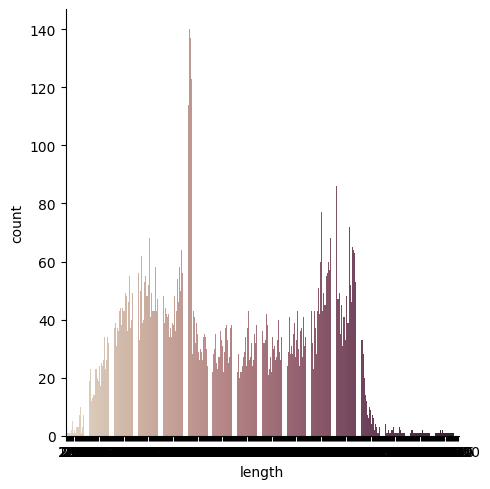

In [20]:
# Let's see how the classes are distributed
sns.catplot(data=train_data_copy, x="length", kind="count", palette="ch:.25")

In [21]:
len(train_data_copy['length'].unique())

377

In [22]:
train_data_copy['length'].describe()

,length
count,10700.0
mean,181.894299
std,162.660269
min,18.0
25%,110.0
50%,169.0
75%,255.0
max,10170.0


We have 377 different tweet lenghts between 18 and 10170 characters. Obiously the bigger is the message, more probabilities we have to find importance in that message, for that reason, we are going to look if those short message could be important for our analisys.

In [23]:
print(train_data_copy["tweet"][train_data_copy.length <= 35])

234       Says "there is no" COVID-19 virus.
268                     There is no pandemic
272       Coronavirus was spread via bananas
655         Coronavirus is caused by snakes.
1019              Cocaine kills coronavirus.
1140                      Pier Luigi Bersani
1264       COVID-19 is a “strain of the flu”
1764       COVID-19 is a bacterium not virus
1883                   COVID-19 is Airborne.
2407                 Cocaine cures COVID-19.
2567          COVID-19 case in Bettiah Jail.
2691         Biomagnetism cures coronavirus.
2822        Dawood Ibrahim died of Covid-19.
2976      Drinking alcohol can cure Covid-19
3141                  COVID-19 TEST a FRAUD?
3462              NO MORE CORONA VIRUS DEATH
3600      Now cases. https://t.co/APHMFyirSj
3619            Boiled sumac cures COVID-19.
4068             Weed kills the coronavirus.
4310      Avoid cold beverages to stay safe.
4538      Coronavirus is caused by bat soup.
4579               Coffee cures coronavirus.
4673      

Looking for short messages, we can find some interesting behaviour. We see messages stating different conspirations about the COVID-19, such as "Coronavirus was spread via bananas" or "There is no pandemic" among others.

Probably, all these messages has the fake label because it is a bunch of nosense that people say in twitter with harmfull intentions or just only for an extreme ignorance about the topic.

In [24]:
print(train_data_copy[['tweet','label']][train_data_copy.length <= 35])

                                     tweet label
234     Says "there is no" COVID-19 virus.  fake
268                   There is no pandemic  fake
272     Coronavirus was spread via bananas  fake
655       Coronavirus is caused by snakes.  fake
1019            Cocaine kills coronavirus.  fake
1140                    Pier Luigi Bersani  fake
1264     COVID-19 is a “strain of the flu”  fake
1764     COVID-19 is a bacterium not virus  fake
1883                 COVID-19 is Airborne.  fake
2407               Cocaine cures COVID-19.  fake
2567        COVID-19 case in Bettiah Jail.  fake
2691       Biomagnetism cures coronavirus.  fake
2822      Dawood Ibrahim died of Covid-19.  fake
2976    Drinking alcohol can cure Covid-19  fake
3141                COVID-19 TEST a FRAUD?  fake
3462            NO MORE CORONA VIRUS DEATH  fake
3600    Now cases. https://t.co/APHMFyirSj  real
3619          Boiled sumac cures COVID-19.  fake
4068           Weed kills the coronavirus.  fake
4310    Avoid cold b

The only real is a short text with a image about the US daily reported cases from March 1st to July 31th.

To sum up, we are keeping all sort of messages becasue we could take into account the length of the meassure to locate those people who intends to disinformate. It is clear that the short ones are those with the biggest nonsense in the majority of scenarios, however, we cannot ensure that short message is equal to fake messages or people who want to disinformate.

In [25]:
# Now we are going to split the dataset into real tweets and fake tweets
real_tweets = train_data_copy[train_data_copy['label'] == 'real']
fake_tweets = train_data_copy[train_data_copy['label'] == 'fake']

In [26]:
real_tweets.length.describe()

,length
count,5600.0
mean,217.124107
std,150.402974
min,34.0
25%,155.0
50%,227.0
75%,272.0
max,10170.0


In [27]:
fake_tweets.length.describe()

,length
count,5100.0
mean,143.210588
std,166.785284
min,18.0
25%,82.75
50%,118.0
75%,174.0
max,8846.0


We can see in the mean that short message tend to be fake ones. This information could be quite usefull

[WORD]: https t | [IMPORTANCE]: 1.0
[WORD]: t co | [IMPORTANCE]: 1.0
[WORD]: COVID | [IMPORTANCE]: 0.17756482525366404
[WORD]: COVID19 | [IMPORTANCE]: 0.17155204810221722
[WORD]: state | [IMPORTANCE]: 0.1360390830514844
[WORD]: number | [IMPORTANCE]: 0.12269823374671177
[WORD]: amp | [IMPORTANCE]: 0.12063134160090191
[WORD]: people | [IMPORTANCE]: 0.11443066516347238
[WORD]: new case | [IMPORTANCE]: 0.10390830514844043
[WORD]: case | [IMPORTANCE]: 0.09977452085682074
[WORD]: confirmed case | [IMPORTANCE]: 0.09601653513716647
[WORD]: today | [IMPORTANCE]: 0.0794813979706877
[WORD]: test | [IMPORTANCE]: 0.0751597143930853
[WORD]: day | [IMPORTANCE]: 0.0723412251033446
[WORD]: new | [IMPORTANCE]: 0.07215332581736189
[WORD]: one | [IMPORTANCE]: 0.07046223224351747
[WORD]: reported | [IMPORTANCE]: 0.06858323938369035
[WORD]: will | [IMPORTANCE]: 0.06839534009770763
[WORD]: testing | [IMPORTANCE]: 0.0680195415257422
[WORD]: data | [IMPORTANCE]: 0.06726794438181134
[WORD]: report | [IMPORTANC

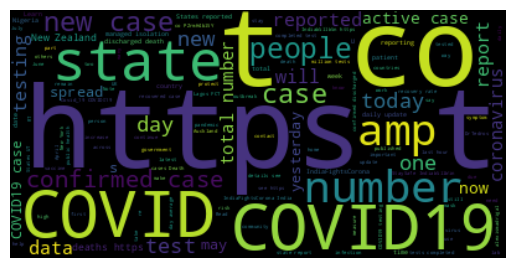

In [28]:
real = (" ").join(real_tweets['tweet'])
fake = (" ").join(fake_tweets['tweet'])

# Generate a wordcloud of real tweets
wordcloud_real = WordCloud().generate(real)

real_keywords = wordcloud_real.words_
for keyword,importance in real_keywords.items():
    print(f'[WORD]: {keyword} | [IMPORTANCE]: {importance}')

plt.imshow(wordcloud_real,interpolation='bilinear')
plt.axis("off")
plt.show()

[WORD]: https t | [IMPORTANCE]: 1.0
[WORD]: t co | [IMPORTANCE]: 1.0
[WORD]: COVID | [IMPORTANCE]: 0.6388349514563106
[WORD]: coronavirus | [IMPORTANCE]: 0.6058252427184466
[WORD]: people | [IMPORTANCE]: 0.22524271844660193
[WORD]: claim | [IMPORTANCE]: 0.18640776699029127
[WORD]: say | [IMPORTANCE]: 0.1796116504854369
[WORD]: new | [IMPORTANCE]: 0.1650485436893204
[WORD]: will | [IMPORTANCE]: 0.15922330097087378
[WORD]: virus | [IMPORTANCE]: 0.15728155339805824
[WORD]: hospital | [IMPORTANCE]: 0.13300970873786408
[WORD]: India | [IMPORTANCE]: 0.12961165048543688
[WORD]: s | [IMPORTANCE]: 0.12815533980582525
[WORD]: vaccine | [IMPORTANCE]: 0.10631067961165049
[WORD]: lockdown | [IMPORTANCE]: 0.10582524271844661
[WORD]: COVID19 | [IMPORTANCE]: 0.1029126213592233
[WORD]: doctor | [IMPORTANCE]: 0.10242718446601942
[WORD]: cure | [IMPORTANCE]: 0.10048543689320388
[WORD]: death | [IMPORTANCE]: 0.09514563106796116
[WORD]: China | [IMPORTANCE]: 0.09271844660194174
[WORD]: time | [IMPORTANCE]:

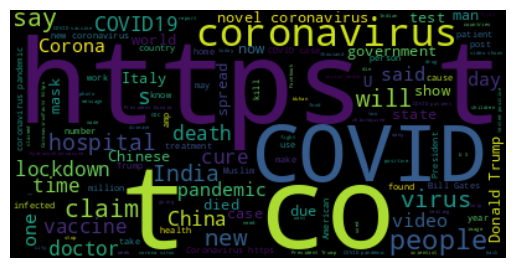

In [29]:
# Generate a wordcloud of fake tweets
wordcloud_fake = WordCloud().generate(fake)

fake_keywords = wordcloud_fake.words_
for keyword,importance in fake_keywords.items():
    print(f'[WORD]: {keyword} | [IMPORTANCE]: {importance}')

plt.imshow(wordcloud_fake,interpolation='bilinear')
plt.axis("off")
plt.show()

After watching both approaches, we could extract some information:

- Real tweets could be informative tweets from some media because we saw that words like "new case" , "confirmed case", "reported" are quite important in this subset of messages, this could be indicate that more formal language is used in real tweets about COVID-19 with the aim to inform the people with reliable information.

- Some quite frecuent words in fake tweets are related with polemical aspects such as 'India', 'China', 'death', 'pandemic', 'lockdown', ...

  Those words, as being quite controversial specially in the COVID-19 context, people tend to use it to boost what they want to say in social media with diverse objetives, maybe to disinformate or just for ignorance.

# Preprocesing

In [30]:
# Tokenize the sentences
real_tweets['tokens'] = real_tweets['tweet'].apply(word_tokenize)
fake_tweets['tokens'] = fake_tweets['tweet'].apply(word_tokenize)

<ipython-input-30-d727ae7b90ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tweet'].apply(word_tokenize)
<ipython-input-30-d727ae7b90ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tweet'].apply(word_tokenize)


In [31]:
real_tweets.head()

,id,tweet,label,length,tokens
0,1,The CDC currently reports 99031 deaths. In gen...,real,190,"[The, CDC, currently, reports, 99031, deaths, ..."
1,2,States reported 1121 deaths a small rise from ...,real,129,"[States, reported, 1121, deaths, a, small, ris..."
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,204,"[#, IndiaFightsCorona, :, We, have, 1524, #, C..."
4,5,Populous states can generate large case counts...,real,231,"[Populous, states, can, generate, large, case,..."
5,6,"Covid Act Now found ""on average each person in...",real,267,"[Covid, Act, Now, found, ``, on, average, each..."


In [32]:
fake_tweets.head()

,id,tweet,label,length,tokens
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,131,"[Politically, Correct, Woman, (, Almost, ), Us..."
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake,83,"[Obama, Calls, Trump, ’, s, Coronavirus, Respo..."
8,9,"???Clearly, the Obama administration did not l...",fake,100,"[?, ?, ?, Clearly, ,, the, Obama, administrati..."
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake,170,"[Retraction—Hydroxychloroquine, or, chloroquin..."
11,12,The NBA is poised to restart this month. In Ma...,fake,218,"[The, NBA, is, poised, to, restart, this, mont..."


## Data Cleaning

In [33]:
# Preprocesamiento de texto
def clean_text(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Eliminar caracteres no alfanuméricos
    return text.split()  # Tokenizar el texto

In [34]:
# Cleaning the text
real_tweets['tokens'] = real_tweets['tokens'].apply(clean_text)
fake_tweets['tokens'] = fake_tweets['tokens'].apply(clean_text)

<ipython-input-34-94836d392b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tokens'].apply(clean_text)
<ipython-input-34-94836d392b9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tokens'].apply(clean_text)


In [35]:
real_tweets.head(),real_tweets.dtypes

(   id                                              tweet label  length  \
 0   1  The CDC currently reports 99031 deaths. In gen...  real     190   
 1   2  States reported 1121 deaths a small rise from ...  real     129   
 3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real     204   
 4   5  Populous states can generate large case counts...  real     231   
 5   6  Covid Act Now found "on average each person in...  real     267   
 
                                               tokens  
 0  [the, cdc, currently, reports, 99031, deaths, ...  
 1  [states, reported, 1121, deaths, a, small, ris...  
 3  [indiafightscorona, we, have, 1524, covid, tes...  
 4  [populous, states, can, generate, large, case,...  
 5  [covid, act, now, found, on, average, each, pe...  ,
 id                 int64
 tweet     string[python]
 label           category
 length             Int64
 tokens            object
 dtype: object)

In [36]:
# Check if there is URL in our data
real_tweets.tweet[real_tweets.tweet.str.contains('http')]

,tweet
1,States reported 1121 deaths a small rise from ...
3,#IndiaFightsCorona: We have 1524 #COVID testin...
4,Populous states can generate large case counts...
5,"Covid Act Now found ""on average each person in..."
6,If you tested positive for #COVID19 and have n...
...,...
10690,Visits to doctor’s offices and emergency rooms...
10691,This paradigm shift “shines a lighton how behi...
10695,#CoronaVirusUpdates: State-wise details of Tot...
10697,296 new cases of #COVID19Nigeria; Plateau-85 E...


In [37]:
fake_tweets.tweet[fake_tweets.tweet.str.contains('http')]

,tweet
2,Politically Correct Woman (Almost) Uses Pandem...
7,Obama Calls Trump’s Coronavirus Response A Cha...
9,Retraction—Hydroxychloroquine or chloroquine w...
11,The NBA is poised to restart this month. In Ma...
20,No Nobel Prize laureate Tasuku Honjo didn't sa...
...,...
10667,NEWS! People having a beer on the beach to bla...
10668,“I’m Putting The Little Bastards Up For Adopti...
10670,U.S. Coronavirus Deaths Top 1100 For A Third D...
10677,Everyone knows that we're facing a real crisis...


We can see that there are more real tweets which uses URLs to defend their speech while there are almost half less URLs in fake tweets.

This fact indicates that people who tend to disinform support less their arguments in web evidences unlike the reliable tweets that support their arguments with different web resourses like graphs or news. For that reason, we will keep also the URLs to have and insight of the nature of those URLs and compare the different source of messages (real and fake).

In [38]:
# Check if there is numbers in our data
real_tweets.tweet[real_tweets.tweet.str.contains('\d')]

,tweet
0,The CDC currently reports 99031 deaths. In gen...
1,States reported 1121 deaths a small rise from ...
3,#IndiaFightsCorona: We have 1524 #COVID testin...
4,Populous states can generate large case counts...
5,"Covid Act Now found ""on average each person in..."
...,...
10693,RT @WHOAFRO: The #COVID19 virus hasn't been fo...
10695,#CoronaVirusUpdates: State-wise details of Tot...
10697,296 new cases of #COVID19Nigeria; Plateau-85 E...
10698,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...


In [39]:
fake_tweets.tweet[fake_tweets.tweet.str.contains('\d')]

,tweet
2,Politically Correct Woman (Almost) Uses Pandem...
9,Retraction—Hydroxychloroquine or chloroquine w...
11,The NBA is poised to restart this month. In Ma...
16,Because of Donald Trump's negligence and incom...
19,Multiple Facebook posts claim that “Aussies wi...
...,...
10681,"""Our (COVID-19) numbers are better than almost..."
10683,Banana contains a lectin that is a powerful an...
10688,NEWS! Coronavirus crisis in Italy leads Donald...
10694,Alkaline food can cure COVID-19


We can see different contexts using numbers:

- To show the number of deaths.
- Time related
- To refer the illness (COVID-19), in that case 19 is also a number counted.

This make us think that maybe we could normalize the word COVID-19 and COVID19 to just COVID because in this particular context that number does not give us relevant information, we all know that the correct term of COVID is COIVD-19 but everyone call is as just COIVD, so we are normalize this word in order to reduce the number of important numeric symbols.

In [40]:
# Diccionario de palabras a reemplazar
reemplazos = {
    'covid19': 'covid',
    'covid-19': 'covid'
}

# Función para realizar múltiples reemplazos
def reemplazar_palabras(lista):
    return [
        reemplazos[palabra] if palabra in reemplazos else palabra
        for palabra in lista
    ]

In [41]:
# Normalize the word COVID-19 to COVID
real_tweets['tokens'] = real_tweets['tokens'].apply(reemplazar_palabras)
fake_tweets['tokens'] = fake_tweets['tokens'].apply(reemplazar_palabras)

<ipython-input-41-69afb35875df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tokens'].apply(reemplazar_palabras)
<ipython-input-41-69afb35875df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tokens'].apply(reemplazar_palabras)


In [42]:
real_tweets.dtypes

,0
id,int64
tweet,string[python]
label,category
length,Int64
tokens,object


In [43]:
real_tweets.head()

,id,tweet,label,length,tokens
0,1,The CDC currently reports 99031 deaths. In gen...,real,190,"[the, cdc, currently, reports, 99031, deaths, ..."
1,2,States reported 1121 deaths a small rise from ...,real,129,"[states, reported, 1121, deaths, a, small, ris..."
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,204,"[indiafightscorona, we, have, 1524, covid, tes..."
4,5,Populous states can generate large case counts...,real,231,"[populous, states, can, generate, large, case,..."
5,6,"Covid Act Now found ""on average each person in...",real,267,"[covid, act, now, found, on, average, each, pe..."


In [44]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

<ipython-input-44-9b2bfa03d491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
<ipython-input-44-9b2bfa03d491>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [45]:
# See the first 10 tweets
number = 1
for tweet in real_tweets['tokens'][:10]:
    print(f'Number {number}: {tweet}')
    number += 1


Number 1: ['cdc', 'currently', 'reports', '99031', 'deaths', 'general', 'discrepancies', 'death', 'counts', 'different', 'sources', 'small', 'explicable', 'death', 'toll', 'stands', 'roughly', '100000', 'people', 'today']
Number 2: ['states', 'reported', '1121', 'deaths', 'small', 'rise', 'last', 'tuesday', 'southern', 'states', 'reported', '640', 'deaths', 'https', 'tcoyasgrtt4ux']
Number 3: ['indiafightscorona', '1524', 'covid', 'testing', 'laboratories', 'india', '25th', 'august', '2020', '36827520', 'tests', 'done', 'profbhargava', 'dg', 'icmrdelhi', 'staysafe', 'indiawillwin', 'https', 'tcoyh3zxknnhz']
Number 4: ['populous', 'states', 'generate', 'large', 'case', 'counts', 'look', 'new', 'cases', 'per', 'million', 'today', '9', 'smaller', 'states', 'showing', 'cases', 'per', 'million', 'california', 'texas', 'al', 'ar', 'id', 'ks', 'ky', 'la', 'ms', 'nv', 'sc', 'https', 'tco1pyw6cwras']
Number 5: ['covid', 'act', 'found', 'average', 'person', 'illinois', 'covid', 'infecting', '111

In [46]:
# We are comparing with the same tweets but without stopwords
number = 1
for tweet in fake_tweets['tokens'][:10]:
    print(f'Number {number}: {tweet}')
    number += 1

Number 1: ['politically', 'correct', 'woman', 'almost', 'uses', 'pandemic', 'excuse', 'reuse', 'plastic', 'bag', 'https', 'tcothf8gunfpe', 'coronavirus', 'nashville']
Number 2: ['obama', 'calls', 'trump', 'coronavirus', 'response', 'chaotic', 'disaster', 'https', 'tcodedqzehasb']
Number 3: ['clearly', 'obama', 'administration', 'leave', 'kind', 'game', 'plan', 'something', 'like']
Number 4: ['retractionhydroxychloroquine', 'chloroquine', 'without', 'macrolide', 'treatment', 'covid', 'multinational', 'registry', 'analysis', 'lancet', 'https', 'tcol5v2x6g9or']
Number 5: ['nba', 'poised', 'restart', 'month', 'march', 'reported', 'utah', 'jazz', 'got', '58', 'coronavirus', 'tests', 'matter', 'hours', 'time', 'us', 'testing', 'sluggish', 'https', 'tcoi8yjjrnoth', 'https', 'tcoo0nk6gpyos']
Number 6: ['donald', 'trump', 'negligence', 'incompetence', '110000', 'people', 'died', 'nearly', '2', 'million', 'cases', 'covid', '20', 'million', 'americans', 'work', 'yet', 'patting', 'back', 'unbeliev

In [47]:
# Remove punctuation marks
real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() or word.isdigit()])
fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() or word.isdigit()])

<ipython-input-47-c40c35b05ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() or word.isdigit()])
<ipython-input-47-c40c35b05ccb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() or word.isdigit()])


Having cleaned what we consider irrelevant for our analysis, the next step is to reduce vocabulary in order to handle better the tweets. For this propouse, we will use differents NLP techniques.



## Lemmatization

In [48]:
# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


<ipython-input-48-13701dfca7da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['tokens'] = real_tweets['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
<ipython-input-48-13701dfca7da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['tokens'] = fake_tweets['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


In [49]:
real_tweets_tokens = (" ").join(token for sentence  in real_tweets["tokens"] for token in sentence)
fake_tweets_tokens = (" ").join(token for sentence  in fake_tweets["tokens"] for token in sentence)

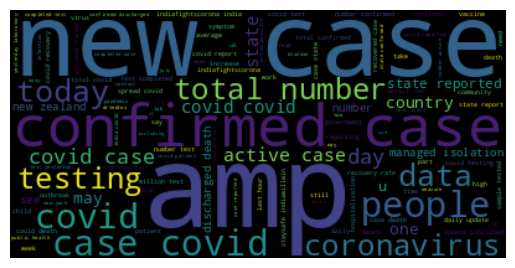

In [50]:
wordcloud_real = WordCloud().generate(real_tweets_tokens)
plt.imshow(wordcloud_real,interpolation='bilinear')
plt.axis("off")
plt.show()

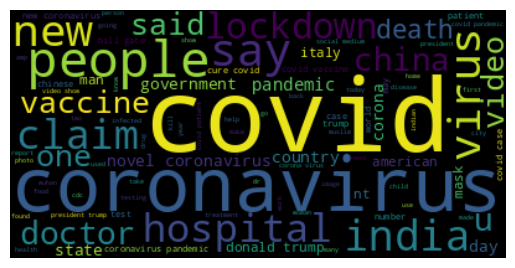

In [51]:
wordcloud_fake = WordCloud().generate(fake_tweets_tokens)
plt.imshow(wordcloud_fake,interpolation='bilinear')
plt.axis("off")
plt.show()

Using lemmatization, we see clearly some difference between disinformers and reliable sources.

In reliable sources we saw words like 'data', 'new case', 'confirmed case', 'case', 'today' which this means that reliable sources would be related with some media or scientist context.

In disinformers, we saw words like 'lockdown', 'hospital', 'India', 'China', 'vaccine', 'death' which means that desinformer try to use contraversial words to create the more disturbance possible using the context and the emotions of the people to make damage.

## Part of speech tagging

We are going to remove all verbs to reduce vocabulary

In [52]:
# Part-of-speech tagging
real_tweets['pos'] = real_tweets['tokens'].apply(lambda tokens: nltk.pos_tag(tokens, tagset='universal'))
fake_tweets['pos'] = fake_tweets['tokens'].apply(lambda tokens: nltk.pos_tag(tokens, tagset='universal'))

# Removing all verbs
real_tweets['pos'] = real_tweets['pos'].apply(lambda pos_tags: [word for word, tag in pos_tags if tag != 'VERB'])
fake_tweets['pos'] = fake_tweets['pos'].apply(lambda pos_tags: [word for word, tag in pos_tags if tag != 'VERB'])

<ipython-input-52-1e15c583abba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['pos'] = real_tweets['tokens'].apply(lambda tokens: nltk.pos_tag(tokens, tagset='universal'))
<ipython-input-52-1e15c583abba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['pos'] = fake_tweets['tokens'].apply(lambda tokens: nltk.pos_tag(tokens, tagset='universal'))
<ipython-input-52-1e15c583abba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [53]:
real_tweets['pos']

,pos
0,"[cdc, currently, 99031, death, general, discre..."
1,"[state, 1121, death, small, rise, last, tuesda..."
3,"[indiafightscorona, 1524, covid, laboratory, i..."
4,"[populous, state, generate, large, case, count..."
5,"[covid, act, average, person, illinois, 111, p..."
...,...
10693,"[rt, whoafro, covid, virus, nt, date, breast, ..."
10695,"[coronavirusupdates, detail, total, covid, cas..."
10697,"[296, new, case, 53317, 40726, discharged, 101..."
10698,"[rt, cdcemergency, dyk, cdcgov, onestop, shop,..."


## N_grams

In [54]:
# Unir las listas en cadenas
real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words='english')
X = vectorizer.fit_transform(real_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
real_ngram1_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(real_ngram1_freq.head(20))

<ipython-input-54-15c84f8a7ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
                    ngram  frequency
105580               http       5038
60494               covid       3754
39904                case       2915
137947                new       1452
196867               test       1349
186582              state       1288
143608             number       1057
75146               death       1014
105775          http http        939
204236              total        877
152229             people        783
73437                 day        654
27360                 amp        651
202122              today        633
138012           new case        603
170265             report        575
56856         coronavirus        529
111670  indiafightscorona        499
210104             update        496
98797              health        477


In [55]:
# Unir las listas en cadenas
fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words='english')
X = vectorizer.fit_transform(fake_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
fake_ngram1_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(fake_ngram1_freq.head(20))

<ipython-input-55-923f99f2bc2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
              ngram  frequency
33000         covid       2171
28223   coronavirus       2093
63974          http       1925
98832        people        507
139714        virus        415
23109         claim        402
136730      vaccine        399
132829        trump        370
18202          case        368
89767           new        366
96245      pandemic        352
138289        video        327
62471      hospital        319
67567         india        315
39989         death        290
105543    president        268
64389     http http        257
97785       patient        240
38030          cure        237
43598        doctor        234


In [56]:
# Unir las listas en cadenas
real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(2, 5), stop_words='english')
X = vectorizer.fit_transform(real_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
real_ngram2_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(real_ngram2_freq.head(20))

<ipython-input-56-019af36ca812>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
                        ngram  frequency
100888              http http        939
132008               new case        603
39487              case covid        455
58030              covid case        327
196308           total number        325
21402             active case        292
59143             covid covid        272
132430         new case covid        211
60315              covid http        200
134530            new zealand        194
67560            daily update        173
137764            number case        172
72510              death http        168
59198       covid covid covid        154
182767  staysafe indiawillwin        150
42498              case state        148
181248           state report        148
139311            number test        143
161709          recovery rate        133
196031            total covid        130


Reliable tweets focus more in telling how many cases are presented across the pandemia as well as there are a lot of web sites in the tweets because of the frecuency of the word 'http' with different words.

Also we can find the n_gram 'staysafe indiawillwin', we can assume that this was a social movement happen in India. Doing a tiny research regarding this 2 words, both are hastags mainly used together by the account 'IndiaFightsCorona' and the propouse of the account is to encourage people to fight against the virus by being responsible.

In [57]:
# Unir las listas en cadenas
fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(2, 5), stop_words='english')
X = vectorizer.fit_transform(fake_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
fake_ngram2_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(fake_ngram2_freq.head(20))

<ipython-input-57-40283d69b8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
                       ngram  frequency
60426              http http        257
86558      novel coronavirus        150
32551             covid http        112
27460       coronavirus http        112
28250   coronavirus pandemic         98
84207        new coronavirus         96
31252             covid case         94
60097       http coronavirus         93
99527        president trump         92
41855           donald trump         83
34524          covid vaccine         83
35835             cure covid         80
33292         covid pandemic         78
60268       http donaldtrump         72
33418          covid patient         70
112853         social medium         63
25808           corona virus         62
31926            covid death         60
29320    coronavirus vaccine         57
35783       cure coronavirus         54


While in the disinformers, there are a common focus on donald trump, in the vaccine and the status of pandemic and deaths.

As we said previously, disinformers aim principaly to reach the biggest amount of people as possible with their speech, regardless of the content of the tweet, for that reason, we often see contraversial topcis in these types of messages like political mentions or vaccines.

Other fact that we saw is that in real tweets use quite more web sites to support the information in comparison to fake tweets about the covid. This led that disinformers only aim for causing damage with contraversial opinions.

Regardless of the information recolected here, we are going to try differents n_grams to see if we would extract more information.

In [58]:
# Unir las listas en cadenas
real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(3, 5), stop_words='english')
X = vectorizer.fit_transform(real_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
real_ngram3_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(real_ngram3_freq.head(20))

<ipython-input-58-6acbf4b60df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tweets['pos_procesed'] = real_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
                             ngram  frequency
105152              new case covid        211
46932            covid covid covid        154
156769           total number case        121
31163           case covid nigeria        115
156474            total covid case        106
156968           total number test        106
145978  staysafe indiawillwin http        103
31335            case covid report         94
105302       new case covid report         91
111142            number test date         89
156983      total number test date         89
109552          number active case         82
100510      million test yesterday         78
50087          covid recovery rate         75
152104           test state report         74
157639     track test state report         73
157638            track test state         73
47917              covid http http         69
130980         report world health         68
54478           daily update state         

In [59]:
# Unir las listas en cadenas
fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Análisis de n-gramas (unigramas y bigramas)
vectorizer = CountVectorizer(ngram_range=(3, 5), stop_words='english')
X = vectorizer.fit_transform(fake_tweets['pos_procesed'])

# Mostrar los n-gramas más frecuentes
fake_ngram3_freq = pd.DataFrame(
    zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)),
    columns=['ngram', 'frequency']
).sort_values(by='frequency', ascending=False)
print("Frecuencias de n-gramas más comunes:")
print(fake_ngram3_freq.head(20))

<ipython-input-59-76a9482fba28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_tweets['pos_procesed'] = fake_tweets['pos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Frecuencias de n-gramas más comunes:
                                       ngram  frequency
24740                        covid http http         27
91416                 thousand time multiple         26
45815           http donaldtrump coronavirus         24
98253                    video thousand time         23
62015                 multiple post facebook         21
102034             world health organization         21
90723                    test positive covid         19
92012                     time multiple post         19
91393                 thousand time facebook         18
92013            time multiple post facebook         18
65603             novel coronavirus pandemic         18
91915                  time facebook twitter         17
74157                  post facebook twitter         16
91423            thousand time multiple post         15
75082                 president donald trump         15
62020         multiple post facebook twitter         14
91424   tho

With larger n-grams, we saw that real tweets keeps the main focus on reporting new cases and track the number of it while the disinformers do not have any relevant information beyond the fact that keeps talking about donal trump and with larger n-grams we saw quite often the appearence of 'twitter', 'facebook', 'video' and 'post'. With that information I could think that disinformers try to redirect false information from differents social media like twitter or facebook as well as keep mentioning ex-president donal trump.

NOTE: remember that the n-grams are saved as (real | fake)_ngram(number)_freq for further usage.

# Topic Modeling

In [64]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer, models

## Embedding

In [92]:
# Restart the index for handling future errors with the embeddings
real_tweets.reset_index(drop=True, inplace=True)
fake_tweets.reset_index(drop=True, inplace=True)

In [ ]:
# Different embeddings

# EMBEDDING 1: Biomedical approach
# Download both model and tokenizer from Hugging Face
model_name = "dmis-lab/biobert-base-cased-v1.1"
transformer_model = AutoModel.from_pretrained(model_name)

# Including in SentenceTransformers
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
embedding_model_biobert = SentenceTransformer(modules=[word_embedding_model, pooling_model])

embeddings_biobert_real = embedding_model_biobert.encode(real_tweets['pos_procesed'])
embeddings_biobert_fake = embedding_model_biobert.encode(fake_tweets['pos_procesed'])

# EMBEDDING 2: fake news approach
model_name = "jy46604790/Fake-News-Bert-Detect"
transformer_model = AutoModel.from_pretrained(model_name)

word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
embedding_model_pudmed = SentenceTransformer(modules=[word_embedding_model, pooling_model])

embeddings_pudmed_real = embedding_model_pudmed.encode(real_tweets['pos_procesed'])
embeddings_pudmed_fake = embedding_model_pudmed.encode(fake_tweets['pos_procesed'])

Some weights of RobertaModel were not initialized from the model checkpoint at jy46604790/Fake-News-Bert-Detect and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at jy46604790/Fake-News-Bert-Detect and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Dimensionality Reduction

In [68]:
from umap import UMAP

In [69]:
umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', random_state=42, low_memory=False)

## Clustering

In [70]:
from hdbscan import HDBSCAN

In [71]:
cluster_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

## Vectorizers

In [72]:
# bag-of-words representation
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1,2))

## Topic representation

In [73]:
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

## Fine Tunning

In [74]:
representation_model = KeyBERTInspired()

In [85]:
# Modelado de temas con BERTopic
# Inicializar BERTopic - Tweets reales
topic_model_real = BERTopic(
  embedding_model=embedding_model_biobert,
  umap_model=umap_model,
  hdbscan_model=cluster_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,
  representation_model=representation_model,
  calculate_probabilities = True,
  min_topic_size = 50,
  n_gram_range=(1, 2),
  verbose = True,
  language='english')

# Ajustar el modelo a los textos limpios
topics_real, probs_real = topic_model_real.fit_transform(real_tweets['pos_procesed'])

2025-01-03 07:16:24,443 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/175 [00:00<?, ?it/s]

2025-01-03 07:33:39,386 - BERTopic - Embedding - Completed ✓
2025-01-03 07:33:39,389 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-03 07:34:03,517 - BERTopic - Dimensionality - Completed ✓
2025-01-03 07:34:03,523 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-03 07:34:04,729 - BERTopic - Cluster - Completed ✓
2025-01-03 07:34:04,750 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-03 07:35:41,015 - BERTopic - Representation - Completed ✓


In [79]:
# Inicializar BERTopic - Tweets falsos
topic_model_fake = BERTopic(
  embedding_model=embedding_model_biobert,
  umap_model=umap_model,
  hdbscan_model=cluster_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,
  representation_model=representation_model,
  calculate_probabilities = True,
  min_topic_size = 50,
  n_gram_range=(1, 2),
  verbose = True,
  language='english')

# Ajustar el modelo a los textos limpios
topics_fake, probs_fake = topic_model_fake.fit_transform(fake_tweets['pos_procesed'])

2025-01-03 06:57:00,353 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/160 [00:00<?, ?it/s]

2025-01-03 07:06:18,217 - BERTopic - Embedding - Completed ✓
2025-01-03 07:06:18,220 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-03 07:06:33,128 - BERTopic - Dimensionality - Completed ✓
2025-01-03 07:06:33,131 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-03 07:06:34,378 - BERTopic - Cluster - Completed ✓
2025-01-03 07:06:34,393 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-03 07:08:08,510 - BERTopic - Representation - Completed ✓


In [80]:
!pip install plotly

## Visual Representations

### Using Biomedical Embedding

In [86]:
# Visualización de los temas - Fake
topic_model_real.visualize_topics().show()

In [87]:
# Visualización de los temas - Fake
topic_model_fake.visualize_topics().show()

In [88]:
# Visualización del heatmap de similitud entre temas - Fake
topic_model_fake.visualize_heatmap().show()

In [ ]:
# Asignar una clase para visualizar temas por clase
topics_per_class = topic_model_fake.topics_per_class(fake_tweets['pos_procesed'], classes=train_data['label'])

# Visualización de temas por clase
topic_model.visualize_topics_per_class(topics_per_class).show()

In [89]:
# Visualización del mapa de documentos - Real
topic_model_real.visualize_document_datamap(real_tweets['pos_procesed'], embeddings=embeddings_biobert_real)

NameError: name 'embeddings_biobert_real' is not defined

In [ ]:
# Visualización del mapa de documentos - Fake
topic_model_fake.visualize_document_datamap(fake_tweets['pos_procesed'], embeddings=embeddings_biobert_fake)

In [ ]:
# Añadir los temas al DataFrame
fake_tweets['topic'] = topics_fake
real_tweets['topic'] = topics_real

# Visualización adicional: Distribución de temas por categoría
topic_distribution_real = train_data.groupby(['label', 'topic']).size().reset_index(name='counts')
topic_distribution_fake = train_data.groupby(['label', 'topic']).size().reset_index(name='counts')

# Crear el gráfico de barras - Real
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_distribution_real, x='topic', y='counts', hue='label')
plt.title('Distribución de temas por categoría')
plt.xlabel('Temas')
plt.ylabel('Cantidad de documentos')
plt.legend(title='Clase')
plt.show()

In [ ]:
# Crear el gráfico de barras - Fake
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_distribution_fake, x='topic', y='counts', hue='label')
plt.title('Distribución de temas por categoría')
plt.xlabel('Temas')
plt.ylabel('Cantidad de documentos')
plt.legend(title='Clase')
plt.show()

In [ ]:
# Visualización adicional: Nubes de palabras por tema
for topic_id in set(topics):
    words = topic_model_real.get_topic(topic_id)  # Palabras clave del tema
    if words:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
            ' '.join([word[0] for word in words])
        )
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de palabras para el tema {topic_id}')
        plt.show()


In [ ]:
# Visualización adicional: Nubes de palabras por tema
for topic_id in set(topics):
    words = topic_model_fake.get_topic(topic_id)  # Palabras clave del tema
    if words:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
            ' '.join([word[0] for word in words])
        )
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de palabras para el tema {topic_id}')
        plt.show()

In [ ]:
# Resultados generales
topic_info_real = topic_model_real.get_topic_info()
topic_info_fake = topic_model_fake.get_topic_info()

print("Información de los temas:")
print(f'---[REAL]---\n{topic_info_real}')
print(f'---[FAKE]---\n{topic_info_fake}')

In [ ]:
# Asignar temas al DataFrame original
train_data['topic'] = topics

# Guardar resultados procesados en un archivo CSV para análisis posterior
train_data.to_csv("processed_constraint_aaai.csv", index=False)
print("Archivo procesado guardado como 'processed_constraint_aaai.csv'")

### Using Fake News Embedding